In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


blinkit_data = pd.read_csv(r'blinkit_products.csv')

# Displaying basic info
print("Dataset Overview:")
print(blinkit_data.info())
print("\nFirst 5 Rows:")
print(blinkit_data.head())


if 'shelf_life_days' in blinkit_data.columns:
    blinkit_data['shelf_life_days'] = pd.to_numeric(blinkit_data['shelf_life_days'], errors='coerce')

# Summary Statistics
print("\nSummary Statistics:")
print(blinkit_data.describe())


cleaned_file_path = 'blinkit_products_cleaned.csv'
blinkit_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}.")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB
None

First 5 Rows:
   product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswam

In [4]:
blinkit_data.dtypes

product_id             int64
product_name          object
category              object
brand                 object
price                float64
mrp                  float64
margin_percentage    float64
shelf_life_days        int64
min_stock_level        int64
max_stock_level        int64
dtype: object

In [5]:


print("\nMissing Values:")
print(blinkit_data.isnull().sum())






Missing Values:
product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


In [19]:
# blinkit_data.fillna(blinkit_data.median(), inplace=True)

In [6]:
print("\nDuplicate Rows:", blinkit_data.duplicated().sum())
blinkit_data.drop_duplicates(inplace=True)


Duplicate Rows: 0


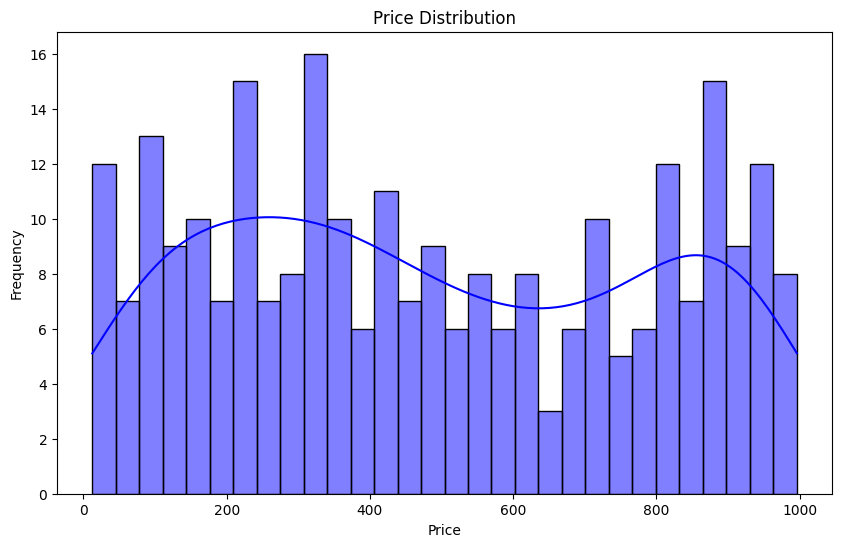

In [7]:
# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(blinkit_data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()








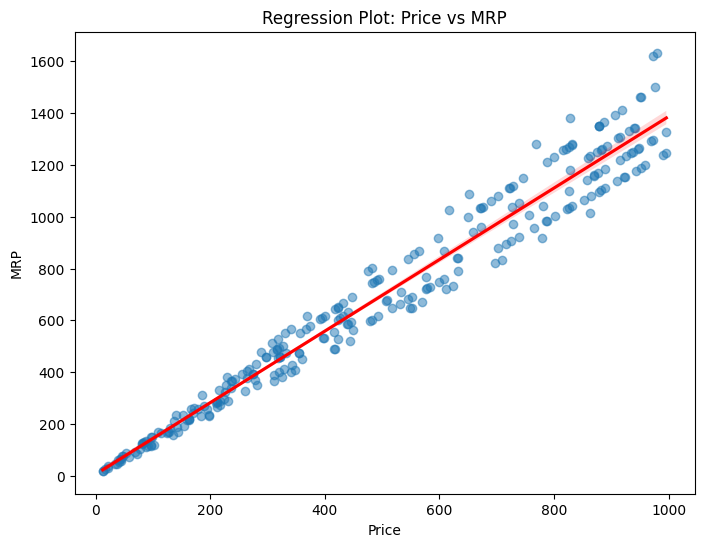

In [8]:
# Regression Plot - Price vs MRP
if 'price' in blinkit_data.columns and 'mrp' in blinkit_data.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=blinkit_data, x='price', y='mrp', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Regression Plot: Price vs MRP')
    plt.xlabel('Price')
    plt.ylabel('MRP')
    plt.show()

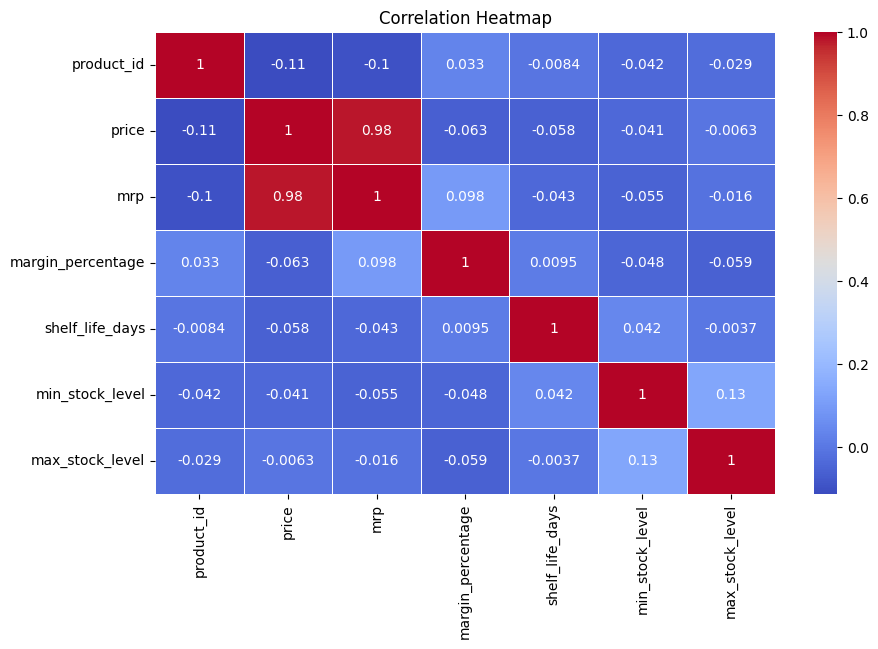

In [17]:
# Correlation Heatmap
numeric_data = blinkit_data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

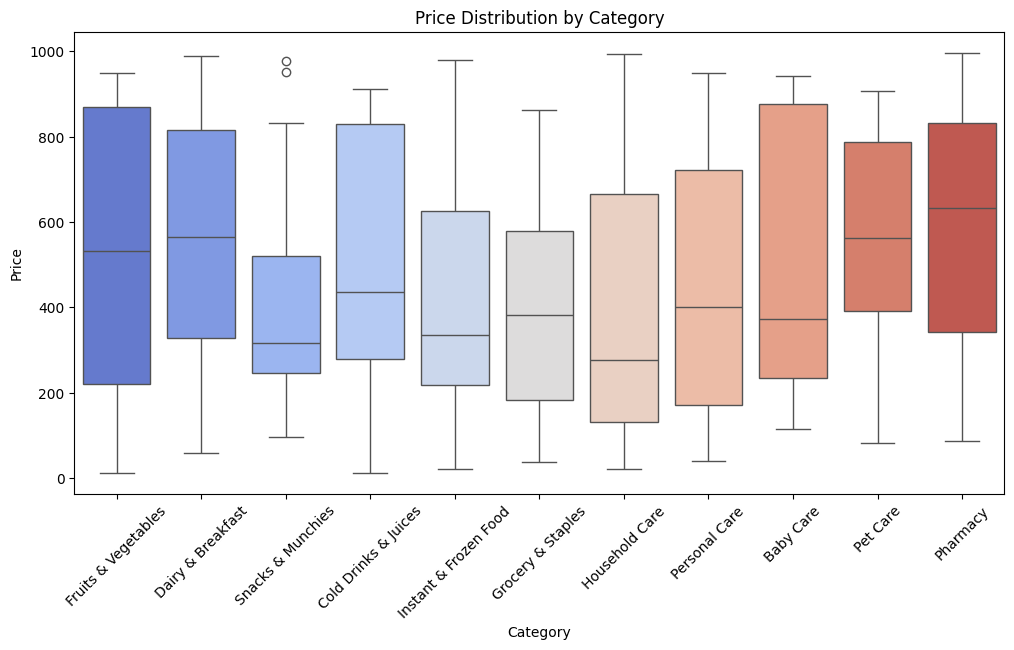

In [10]:
# Boxplot of Price by Category
if 'category' in blinkit_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=blinkit_data, x='category', y='price', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Price Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Price')
    plt.show()


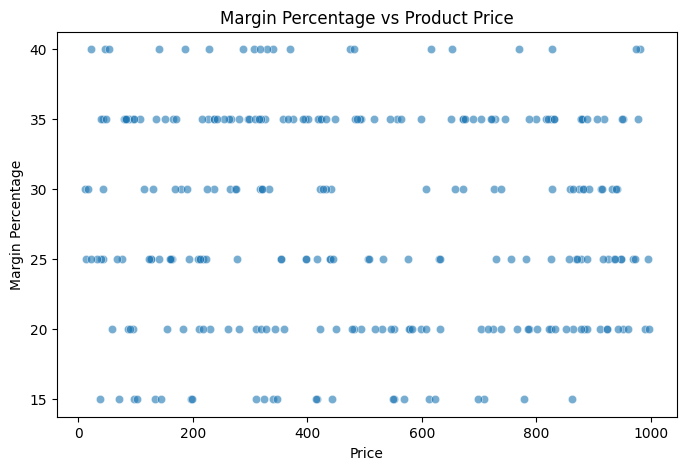

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=blinkit_data, x='price', y='margin_percentage', alpha=0.6)
plt.title('Margin Percentage vs Product Price')
plt.xlabel('Price')
plt.ylabel('Margin Percentage')
plt.show()


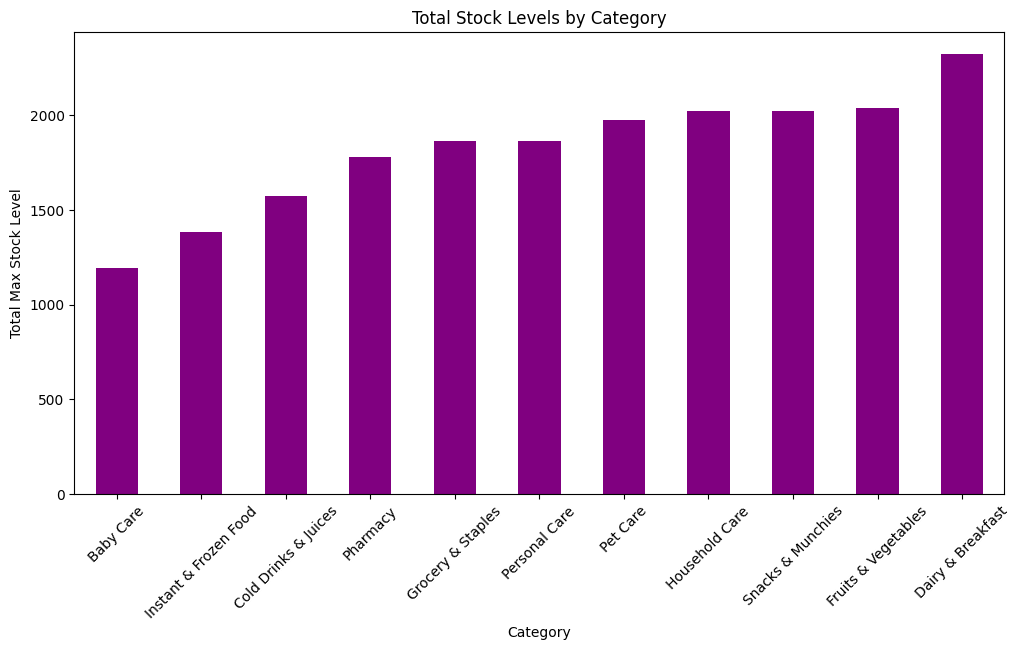

In [12]:
plt.figure(figsize=(12, 6))
blinkit_data.groupby('category')['max_stock_level'].sum().sort_values().plot(kind='bar', color='purple')
plt.title('Total Stock Levels by Category')
plt.xlabel('Category')
plt.ylabel('Total Max Stock Level')
plt.xticks(rotation=45)
plt.show()


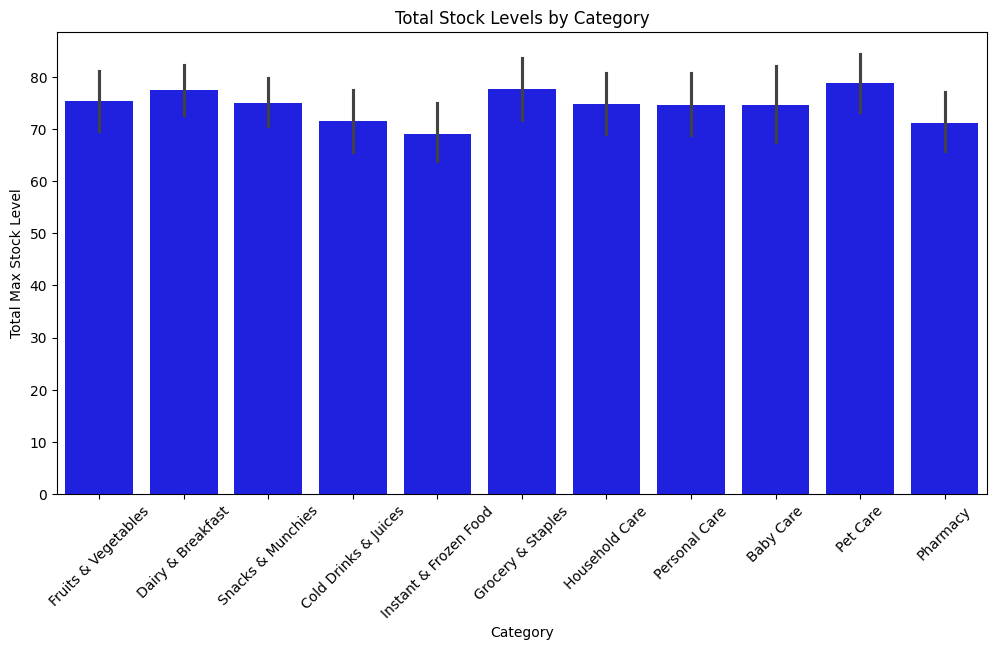

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=blinkit_data,x='category',y='max_stock_level',color='blue')
plt.title('Total Stock Levels by Category')
plt.xlabel('Category')
plt.ylabel('Total Max Stock Level')
plt.xticks(rotation=45)
plt.show()

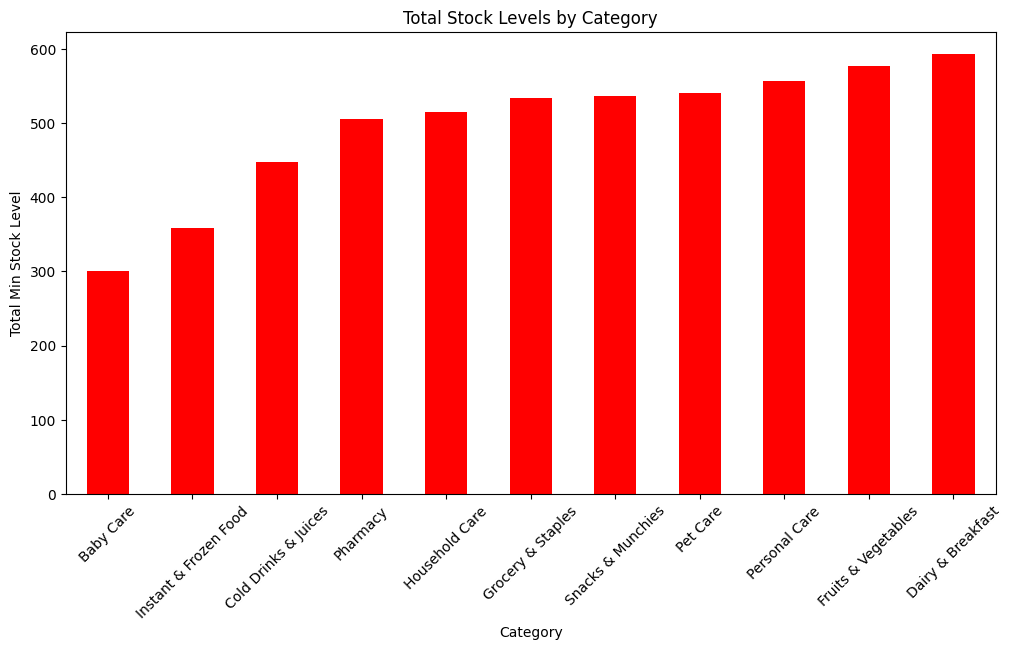

In [13]:
plt.figure(figsize=(12, 6))
blinkit_data.groupby('category')['min_stock_level'].sum().sort_values().plot(kind='bar', color='Red')
plt.title('Total Stock Levels by Category')
plt.xlabel('Category')
plt.ylabel('Total Min Stock Level')
plt.xticks(rotation=45)
plt.show()

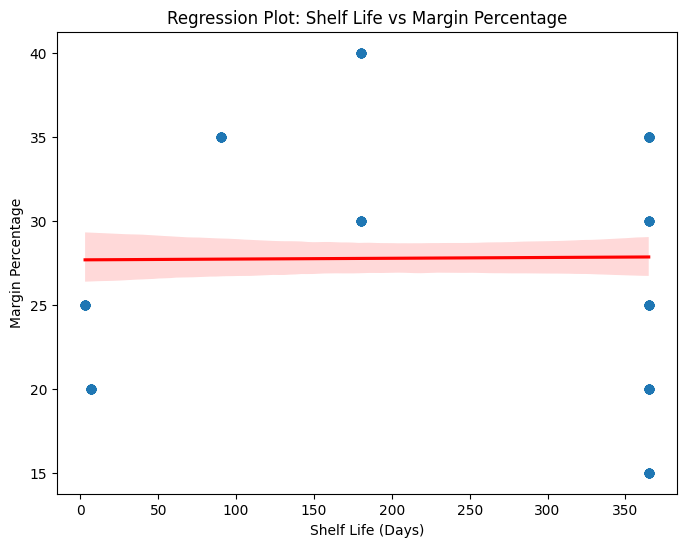

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(data=blinkit_data, x='shelf_life_days', y='margin_percentage', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot: Shelf Life vs Margin Percentage')
plt.xlabel('Shelf Life (Days)')
plt.ylabel('Margin Percentage')
plt.show()


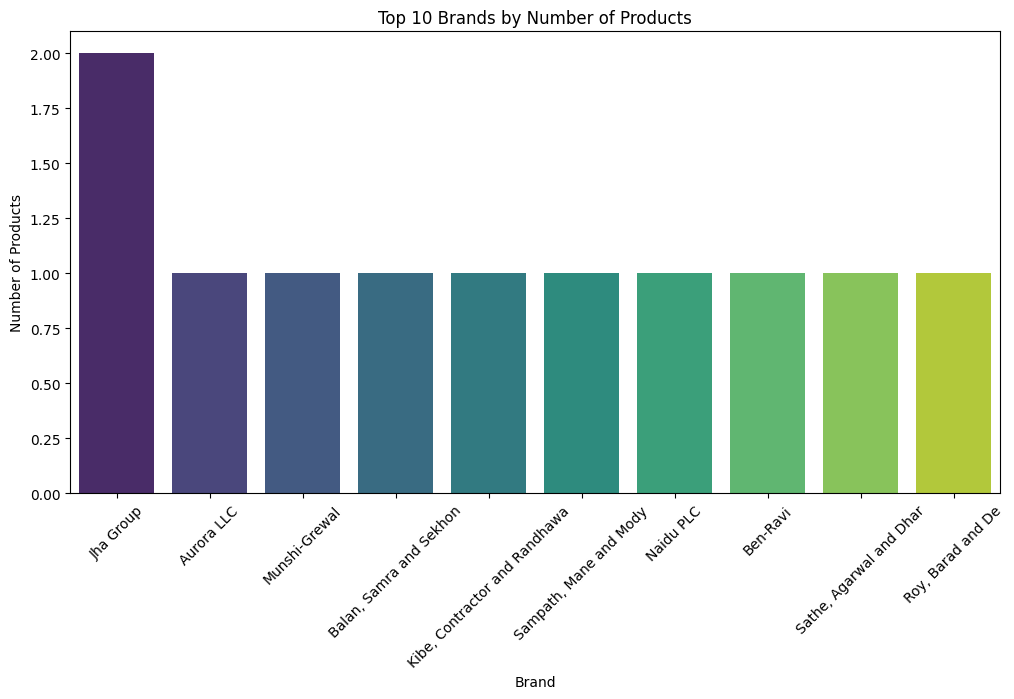

In [15]:
plt.figure(figsize=(12, 6))
top_brands = blinkit_data['brand'].value_counts().head(10)  # Show top 10 brands
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()
